# 第 2 章 感知机
## 2.3 感知机学习算法
### 例 2.1
如下图所示的训练数据集，其正实例点$x_1=(3, 3)^T, x_2=(4, 3)^T$, 负实例点$x_3=(1, 1)^T$，试用感知机算法的原始形式求感知机模型$f(x)=sign(w\cdot x + b)$。这里，$w=(w^{(1)}, w^{(2)})^T, x=(x^{(1)}, x^{(2)})^T$。
![](https://qiniu.lianghao.work/markdown/20220412215305.png)

In [1]:
import numpy as np
import scipy.optimize as optim
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
def distance(w, b, x):
    w = np.array(w).reshape((-1, 1))
    x = np.array(x)
    return x.dot(w)[0] + b

def sign(w, b, x):

    if distance(w, b, x) >= 0:
        return 1
    else:
        return -1

def sgd(w, b, x, y,  lr):
    w = np.array(w)
    x = np.array(x)
    w = w + lr * y * x
    b = b + lr * y
    return w, b

# 初始化， 开始迭代运算
def Train1(train_in, train_out, lr):
    w, b  = [0, 0], 0
    flag = 0

    while flag < len(train_in):
        flag = 0
        for i in range(0, len(train_in)):
            if train_out[i] * distance(w, b, train_in[i]) <= 0:
                # 出现误分类时，进行梯度下降
                w, b = sgd(w, b, train_in[i], train_out[i], lr)
                print("x" + str(i + 1), "  ", "   ", w, "   ", b)
            else:
                flag = flag + 1
    return w, b
def linearY(w, b, x):
    return -1 * (w[0] / w[1]) * x - b / w[1]

In [3]:
train_in = [[3, 3], [4, 3], [1, 1]]
train_out = [1, 1, -1]

x1        [3 3]     1
x3        [2 2]     0
x3        [1 1]     -1
x3        [0 0]     -2
x1        [3 3]     -1
x3        [2 2]     -2
x3        [1 1]     -3


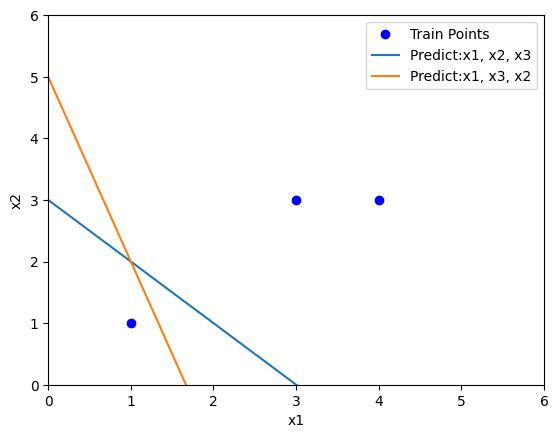

In [4]:
w, b = Train1(train_in, train_out, 1)
# 绘制图像
plt.plot([train_in[i][0]for i in range(len(train_in))] , [train_in[i][1]for i in range(len(train_in))], 'bo', label="Train Points")
x = np.linspace(0, 6, 1000)
y = linearY(w, b, x)
plt.plot(x, y, label="Predict:x1, x2, x3")
plt.plot(x, -3 * x + 5, label="Predict:x1, x3, x2")
plt.xlim(0, 6)
plt.ylim(0, 6)
plt.xlabel("x1")
plt.ylabel("x2")
plt.legend()

### 例 2.2
其正实例点$x_1=(3, 3)^T, x_2=(4, 3)^T$, 负实例点$x_3=(1, 1)^T$,试用感知机学习算法对偶形式求感知机模型

In [5]:
import numpy as np
import scipy.optimize as optim
import matplotlib.pyplot as plt
%matplotlib inline

In [6]:
def Gmatrix(train_in):
    G = []
    for i in range(0, len(train_in)):
        tmp = []
        for j in range(0,len(train_in)):
            tmp.append(np.array(train_in[i]).dot(np.array(train_in[j])))
        G.append(tmp)
    return np.array(G)

def Error(alpha, b, G, train_out, x_index):
    """

    :param alpha: type : list
    :param b: 偏置 type: int
    :param G: 内积矩阵 type : np.array([N][N])
    :param train_out: type
    :param x_index: xi的序号
    :return: True: xi被误分类
    """
    sum = 0.0
    for j in range(len(alpha)):
        sum = sum + alpha[j] * train_out[j] * G[j][x_index]
    if train_out[x_index] * (sum + b) <= 0:
        return True
    return False
def Train2(train_in, train_out, lr):
    # 初始化
    w, alpha, b, flag = np.array([0, 0]), np.array([0, 0, 0]), 0, 0
    G = Gmatrix(train_in)
    while flag < len(train_in):
        flag = 0
        for i in range(0, len(train_in)):
            if Error(alpha, b, G, train_out, i) == True:
                print("x" + str(i+1), alpha[0], " ", alpha[1], " ", alpha[2], " ", b)
                alpha[i] = alpha[i] + lr
                b = b + lr * train_out[i]
            else:
                flag = flag + 1

    for i in range(0, len(train_in)):
        w = w + alpha[i] * train_out[i] * np.array(train_in[i])
    return w, b

def linearY(w, b, x):
    return -1 * (w[0] / w[1]) * x - b / w[1]

x1 0   0   0   0
x3 1   0   0   1
x3 1   0   1   0
x3 1   0   2   -1
x1 1   0   3   -2
x3 2   0   3   -1
x3 2   0   4   -2


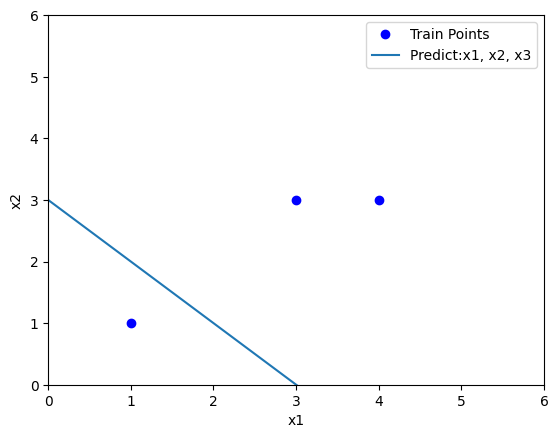

In [7]:
train_in = [[3, 3], [4, 3], [1, 1]]
train_out = [1, 1, -1]
# 绘制图像
plt.plot([train_in[i][0]for i in range(len(train_in))] , [train_in[i][1]for i in range(len(train_in))], 'bo', label="Train Points")
x = np.linspace(0, 6, 1000)
w, b = Train2(train_in, train_out, 1)
y = linearY(w, b, x)
plt.plot(x, y, label="Predict:x1, x2, x3")
plt.xlim(0, 6)
plt.ylim(0, 6)
plt.xlabel("x1")
plt.ylabel("x2")
plt.legend()

## 习题
### 2.1 Minsky 和 Papert指出： 感知机因为是线性模型，所以不能表示复杂的函数，如异或。 验证感知机为什么不能表示异或（XOR）
证明：
给定数据集$T={(x_1, y_1), (x_2, y_2), (x_3, y_3), (x_4, y_4)}$，其中$x_i=(\alpha, \beta)^T, y_i \in \{0, 1\}$.
**假设给定的数据集是线性可分的，即存在一个可分离平面$wx+b$将数据集分为两类**，其中$w=(w_1, w_2)^T$, 数据集中的正实例点为$x_1(0, 0),x_2(1, 1)$，负实例点为$x_3(0, 1), x_4(1, 0)$
$$
\begin{aligned}
(1):\ wx_1 + b > 0 \\
(2):\ wx_2 + b > 0 \\
(3):\ wx_3 + b \le 0 \\
(4):\ wx_4 + b \le 0
\end{aligned}
$$
简化为
$$
\begin{aligned}
(1):\ b > 0\\
(2):\ \alpha \cdot u + \beta \cdot v + b > 0\\
(3):\ \alpha \cdot u + b \le 0\\
(4):\ \beta \cdot v + b \le 0
\end{aligned}
$$
将其中$(1),(2)$项相加,$(3), (4)$项相加，并分别表示如下：
$$
\begin{aligned}
\alpha \cdot u + \beta \cdot v + 2b > 0 \\
\alpha \cdot u + \beta \cdot v + 2b \le 0
\end{aligned}
$$
结果明显相悖，因此，可证：**单层感知机不能表示异或（XOR）**

### 2.2 模仿 例题2.1， 构建训练集求解感知机模型的例子
正实例点$x_1=(2, 3)^T, x_2=(4, 2)^T， x_3=(5, 5), x_4=(2, 2)^T^T$, 负实例点$x_5=(1, 1)^T, x_6=(1.5, 5)^T, x_7=(0.5, 3)^T$
![](https://qiniu.lianghao.work/markdown/20220413215305.png)
![](https://qiniu.lianghao.work/markdown/20220413215400.png)


In [63]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

def distance(w, b, x):
    w = np.array(w).reshape((-1, 1))
    x = np.array(x)
    return x.dot(w)[0] + b

def sign(w, b, x):

    if distance(w, b, x) >= 0:
        return 1
    else:
        return -1

def sgd(w, b, x, y,  lr):
    w = np.array(w)
    x = np.array(x)
    w = w + lr * y * x
    b = b + lr * y
    return w, b

# 初始化， 开始迭代运算
def Train1(train_in, train_out, lr):
    w, b  = [0, 0], 0
    flag = 0
    while flag < len(train_in):
        flag = 0
        for i in range(0, len(train_in)):
            if train_out[i] * distance(w, b, train_in[i]) <= 0:
                # 出现误分类时，进行梯度下降
                w, b = sgd(w, b, train_in[i], train_out[i], lr)
                # print("x" + str(i + 1), "  ", "   ", w, "   ", b)
            else:
                flag = flag + 1
    return w, b

def linearY(w, b, x):
    return -1 * (w[0] / w[1]) * x - b / w[1]

In [64]:
train_input = [(2, 3), (4, 2), (5, 5), (2, 2), (1, 1), (1.5, 5), (0.5, 4)]
train_output = [1, 1, 1, 1, -1, -1, -1]

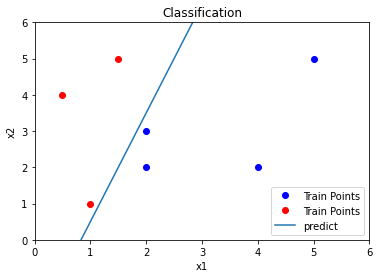

In [68]:
w, b = Train1(train_input, train_output, 1)
# 绘制图像
plt.plot([train_input[i][0]for i in range(0, 4)] , [train_input[i][1]for i in range(0, 4)], 'bo', label="Train Points")
plt.plot([train_input[i][0]for i in range(4, len(train_input))] , [train_input[i][1]for i in range(4, len(train_input))], 'ro', label="Train Points")
x = np.linspace(0, 6, 1000)
y = linearY(w, b, x)
plt.plot(x, y, label="predict")
plt.title("Classification")
plt.xlim(0, 6)
plt.ylim(0, 6)
plt.xlabel("x1")
plt.ylabel("x2")
plt.legend()

### 2.3 证明以下定理：样本集可分的充分必要条件是正实例点集所构成的凸壳与负实例点集所构成的凸壳不相交。
**凸壳的定义如下**：设集合$S \subset R^n$，是由$R^n$中的$k$个点所组成的集合，即$S=\{x_1, x_2, \cdots, x_k\}$。定义$S$的凸壳$conv(S)$为：
$$
conv(S)=\left\{x = \sum_{i=1}^k {\lambda_i x_i} | \sum_{i=1}^k {\lambda_i=1},\lambda_i \ge 0, i=1, 2, 3, \cdots, k \right\}
$$

1. 充分性（样本可分 ——> 凸壳不相交）
如果样本集可分，那么必然存在一个**超平面**$S: w\cdot x+ b = 0$将正实例点集$S^{(1)}=\{x_1^{(1)}, x_2^{(1)}, \cdots, x_k^{(1)}\}$和负实例点集$S^{(2)}=\{x_1^{(2)}, x_2^{(2)}, \cdots, x_k^{(2)}\}$分离，即:
$$
\begin{aligned}
\forall x_i^{(1)} \in S^{(1)},\ w \cdot x_i^{(1)} + b > 0\\
\forall x_i^{(2)} \in S^{(2)},\ w \cdot x_i^{(2)} + b \le 0\\
\end{aligned}
$$
正实例点集和负实例点集的**凸壳表示如下**：
$$
\begin{aligned}
conv(S^{(1)})=\left\{x^{(1)} = \sum_{i=1}^k {\lambda_i x_i^{(1)}} | \sum_{i=1}^k {\lambda_i=1},\lambda_i \ge 0, i=1, 2, 3, \cdots, k \right\}\\
conv(S^{(2)})=\left\{x^{(2)} = \sum_{i=1}^k {\lambda_i x_i^{(2)}} | \sum_{i=1}^k {\lambda_i=1},\lambda_i \ge 0, i=1, 2, 3, \cdots, k \right\}
\end{aligned}
$$
分别将正实例点集和负实例点集带入超平面中
$$
\begin{aligned}
\because \sum_{i=1}^k \lambda_i = 1\\
\therefore w \cdot x^{(1)}+b =w \cdot \sum_{i=1}^k \lambda_i(x_i^{(1)}) + \sum_{i=1}^k \lambda_i b= \sum_{i=1}^k \lambda_i(w \cdot x_i^{(1)} + b)> 0\\
w \cdot x^{(2)}+b =w \cdot \sum_{i=1}^k \lambda_i(x_i^{(2)}) + \sum_{i=1}^k \lambda_i b= \sum_{i=1}^k \lambda_i(w \cdot x_i^{(2)} + b)\le 0
\end{aligned}
$$
所以，**两个凸壳不相交**
2. 必要性（凸壳不相交 ——> 样本可分）
**超平面分离定理(Separating hyperplane theorem)**